In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import transformers
import re
import torch

In [2]:
df_train = pd.DataFrame()
df_train["Sentences"] = []
df_train["Sentiment"] = []
df_train
for dirname, _, filenames in os.walk('train/neg'):
    print(len(filenames))
    for file in filenames[:1000]:
        with open(os.path.join(dirname, file), 'r', encoding="utf8") as file:
            review = file.read()
            review = re.sub('<.*?>', '', review)
        df_train.loc[len(df_train.index)] = [review, 0]
for dirname, _, filenames in os.walk('train/pos'):
    print(len(filenames))
    for file in filenames[:1000]:
        with open(os.path.join(dirname, file), 'r',encoding="utf8") as file:
            review = file.read().strip()
            review = re.sub('<.*?>', '', review)
        df_train.loc[len(df_train.index)] = [review, 1]
    

12500
12500


In [3]:
df_train

,Sentences,Sentiment
0,Working with one of the best Shakespeare sourc...,0
1,"Well...tremors I, the original started off in ...",0
2,Ouch! This one was a bit painful to sit throug...,0
3,"I've seen some crappy movies in my life, but t...",0
4,"""Carriers"" follows the exploits of two guys an...",0
...,...,...
1995,"Without ""mental anachronism"", this film which ...",1
1996,This movie is just great. It's entertaining fr...,1
1997,I've seen the original English version on vide...,1
1998,"Hello, I was alanrickmaniac. I'm a Still Crazy...",1


In [4]:
df_test = pd.DataFrame()
df_test["Sentences"] = []
df_test["Sentiment"] = []
df_test
for dirname, _, filenames in os.walk('test/neg'):
    print(len(filenames))
    for file in filenames[:250]:
        with open(os.path.join(dirname, file), 'r', encoding="utf8") as file:
            review = file.read().strip()
            review = re.sub('<.*?>', '', review)
        df_test.loc[len(df_test.index)] = [review, 0]
for dirname, _, filenames in os.walk('test/pos'):
    print(len(filenames))
    for file in filenames[:250]:
        with open(os.path.join(dirname, file), 'r', encoding="utf8") as file:
            review = file.read().strip()
            review = re.sub('<.*?>', '', review)
        df_test.loc[len(df_test.index)] = [review, 1]

12500
12500


In [5]:
df_test

,Sentences,Sentiment
0,Alan Rickman & Emma Thompson give good perform...,0
1,I have seen this movie and I did not care for ...,0
2,"In Los Angeles, the alcoholic and lazy Hank Ch...",0
3,"This film is bundled along with ""Gli fumavano ...",0
4,I only comment on really very good films and o...,0
...,...,...
495,So after years and years I finally track this ...,1
496,I'm astonished how a filmmaker notorious for h...,1
497,We all enjoyed the movie. It is a very charmin...,1
498,"Fascinating and amusingly bad, Lights of New Y...",1


In [6]:
train_texts, train_labels = df_train["Sentences"], df_train["Sentiment"]
test_texts, test_labels = df_test["Sentences"], df_test["Sentiment"]

len(train_texts), len(train_labels), len(test_texts), len(test_labels)

(2000, 2000, 500, 500)

In [7]:
train_texts[0]

"Working with one of the best Shakespeare sources, this film manages to be creditable to it's source, whilst still appealing to a wider audience.Branagh steals the film from under Fishburne's nose, and there's a talented cast on good form."

[Text(0.5, 1.0, 'No. of characters in each sentence'),
 Text(0.5, 0, 'Number of sentence'),
 Text(0, 0.5, 'Number of Characters in each sentence')]

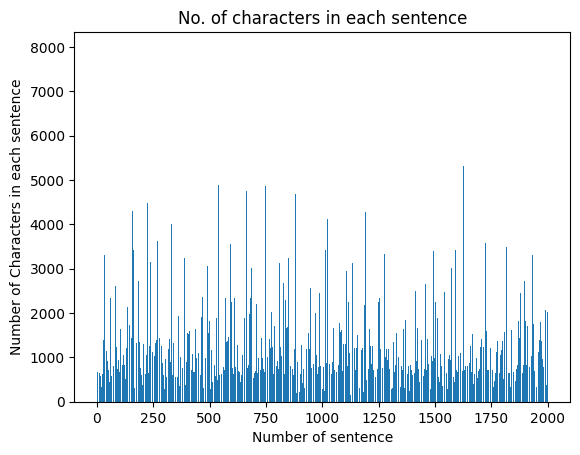

In [8]:
sentences = [len(sent) for sent in train_texts]

plt.bar(range(1,2001), sentences)
plt.gca().set(title='No. of characters in each sentence', xlabel='Number of sentence', ylabel='Number of Characters in each sentence')

In [9]:
max_char = max(sentences)
max_char

7940

Getting Tokenized Input for training data

In [10]:
from transformers import BertTokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True)

In [11]:
encoded_df = pd.DataFrame()
encoded_df["Tokens"] = []
encoded_df["Sentiment"] = []

for i in range(len(train_texts)):
    encoded_sent = tokenizer.encode_plus(
                text= train_texts[i],  # Preprocess sentence
                add_special_tokens=True,        # Add `[CLS]` and `[SEP]`
                max_length=max_char,                  # Max length to truncate/pad
                padding ='max_length',         # Pad sentence to max length
                #return_tensors='pt',           # Return PyTorch tensor
                return_attention_mask=True      # Return attention mask
                )
    encoded_df.loc[len(encoded_df.index)] = [encoded_sent['input_ids'], train_labels[i]]


In [12]:
encoded_df

,Tokens,Sentiment
0,"[101, 2551, 2007, 2028, 1997, 1996, 2190, 8101...",0
1,"[101, 2092, 1012, 1012, 1012, 27734, 2015, 104...",0
2,"[101, 15068, 2818, 999, 2023, 2028, 2001, 1037...",0
3,"[101, 1045, 1005, 2310, 2464, 2070, 10231, 768...",0
4,"[101, 1000, 11363, 1000, 4076, 1996, 20397, 19...",0
...,...,...
1995,"[101, 2302, 1000, 5177, 9617, 2818, 4948, 2964...",1
1996,"[101, 2023, 3185, 2003, 2074, 2307, 1012, 2009...",1
1997,"[101, 1045, 1005, 2310, 2464, 1996, 2434, 2394...",1
1998,"[101, 7592, 1010, 1045, 2001, 5070, 11285, 270...",1


In [13]:
train_matrix = np.stack(encoded_df['Tokens'].apply(np.array))

# print the resulting matrix and its shape
print(train_matrix)
print(train_matrix.shape)

[[  101  2551  2007 ...     0     0     0]
 [  101  2092  1012 ...     0     0     0]
 [  101 15068  2818 ...     0     0     0]
 ...
 [  101  1045  1005 ...     0     0     0]
 [  101  7592  1010 ...     0     0     0]
 [  101  1999  2070 ...     0     0     0]]
(2000, 7940)


In [14]:
train_tokens = encoded_df["Tokens"]
print(train_tokens)
train_labels = encoded_df["Sentiment"]
print(train_labels)

0       [101, 2551, 2007, 2028, 1997, 1996, 2190, 8101...
1       [101, 2092, 1012, 1012, 1012, 27734, 2015, 104...
2       [101, 15068, 2818, 999, 2023, 2028, 2001, 1037...
3       [101, 1045, 1005, 2310, 2464, 2070, 10231, 768...
4       [101, 1000, 11363, 1000, 4076, 1996, 20397, 19...
                              ...                        
1995    [101, 2302, 1000, 5177, 9617, 2818, 4948, 2964...
1996    [101, 2023, 3185, 2003, 2074, 2307, 1012, 2009...
1997    [101, 1045, 1005, 2310, 2464, 1996, 2434, 2394...
1998    [101, 7592, 1010, 1045, 2001, 5070, 11285, 270...
1999    [101, 1999, 2070, 3971, 1010, 1996, 14532, 199...
Name: Tokens, Length: 2000, dtype: object
0       0
1       0
2       0
3       0
4       0
       ..
1995    1
1996    1
1997    1
1998    1
1999    1
Name: Sentiment, Length: 2000, dtype: int64


Tokenized Inputs of Test

[Text(0.5, 1.0, 'No. of characters in each sentence'),
 Text(0.5, 0, 'Number of sentence'),
 Text(0, 0.5, 'Number of Characters in each sentence')]

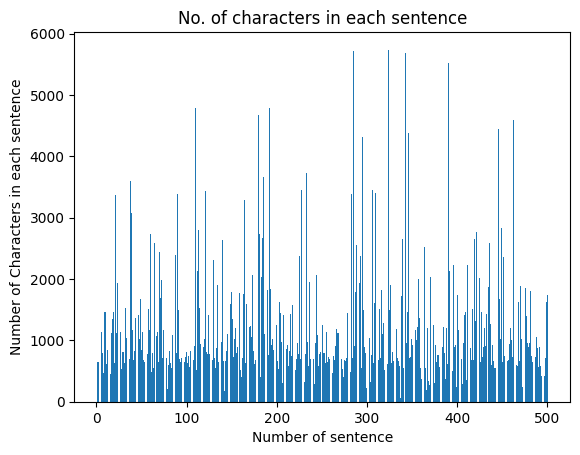

In [15]:
sentences = [len(sent) for sent in test_texts]

#plt.rcParams.update({'figure.figsize':(7,5), 'figure.dpi':100})
# plt.bar(range(1,25001), sentences, color = ['red'])
plt.bar(range(1,501), sentences)
plt.gca().set(title='No. of characters in each sentence', xlabel='Number of sentence', ylabel='Number of Characters in each sentence')

In [16]:
max_char = max(sentences)
max_char

5736

In [17]:
from transformers import BertTokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True)

In [18]:
encoded_df_test = pd.DataFrame()
encoded_df_test["Tokens"] = []
encoded_df_test["Sentiment"] = []

for i in range(len(test_texts)):
    encoded_sent = tokenizer.encode_plus(
                text= test_texts[i],  # Preprocess sentence
                add_special_tokens=True,        # Add `[CLS]` and `[SEP]`
                max_length=max_char,                  # Max length to truncate/pad
                padding ='max_length',         # Pad sentence to max length
                #return_tensors='pt',           # Return PyTorch tensor
                return_attention_mask=True      # Return attention mask
                )
    encoded_df_test.loc[len(encoded_df_test.index)] = [encoded_sent['input_ids'], test_labels[i]]

In [19]:
encoded_df_test

,Tokens,Sentiment
0,"[101, 5070, 6174, 2386, 1004, 5616, 5953, 2507...",0
1,"[101, 1045, 2031, 2464, 2023, 3185, 1998, 1045...",0
2,"[101, 1999, 3050, 3349, 1010, 1996, 14813, 199...",0
3,"[101, 2023, 2143, 2003, 24378, 2247, 2007, 100...",0
4,"[101, 1045, 2069, 7615, 2006, 2428, 2200, 2204...",0
...,...,...
495,"[101, 2061, 2044, 2086, 1998, 2086, 1045, 2633...",1
496,"[101, 1045, 1005, 1049, 22741, 2129, 1037, 121...",1
497,"[101, 2057, 2035, 5632, 1996, 3185, 1012, 2009...",1
498,"[101, 17160, 1998, 19142, 2135, 2919, 1010, 45...",1


In [20]:
test_tokens = encoded_df_test["Tokens"]
print(test_tokens)
test_labels = encoded_df_test["Sentiment"]
print(test_labels)

0      [101, 5070, 6174, 2386, 1004, 5616, 5953, 2507...
1      [101, 1045, 2031, 2464, 2023, 3185, 1998, 1045...
2      [101, 1999, 3050, 3349, 1010, 1996, 14813, 199...
3      [101, 2023, 2143, 2003, 24378, 2247, 2007, 100...
4      [101, 1045, 2069, 7615, 2006, 2428, 2200, 2204...
                             ...                        
495    [101, 2061, 2044, 2086, 1998, 2086, 1045, 2633...
496    [101, 1045, 1005, 1049, 22741, 2129, 1037, 121...
497    [101, 2057, 2035, 5632, 1996, 3185, 1012, 2009...
498    [101, 17160, 1998, 19142, 2135, 2919, 1010, 45...
499    [101, 2009, 2001, 3172, 1998, 1045, 2001, 2410...
Name: Tokens, Length: 500, dtype: object
0      0
1      0
2      0
3      0
4      0
      ..
495    1
496    1
497    1
498    1
499    1
Name: Sentiment, Length: 500, dtype: int64


Bert Classifier

In [26]:
from torch import nn
from transformers import BertModel

class BertBinaryClassifier(nn.Module):
    def __init__(self, dropout=0.1):
        super(BertBinaryClassifier, self).__init__()

        self.bert = BertModel.from_pretrained('bert-base-uncased')

        self.dropout = nn.Dropout(dropout)
        self.linear = nn.Linear(768, 1)
        self.sigmoid = nn.Sigmoid()
    
    def forward(self, tokens, masks=None):
        _, pooled_output = self.bert(tokens, attention_mask=masks, output_all_encoded_layers=False)
        dropout_output = self.dropout(pooled_output)
        linear_output = self.linear(dropout_output)
        proba = self.sigmoid(linear_output)
        return proba

In [27]:
bert_clf = BertBinaryClassifier()

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight', 'cls.predictions.decoder.weight', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [28]:
x = torch.tensor(train_tokens[:3])
y, pooled = bert_clf.bert(x, output_all_encoded_layers=False)
x.shape, y.shape, pooled.shape

TypeError: BertModel.forward() got an unexpected keyword argument 'output_all_encoded_layers'